In [200]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Data Preprocessing

In [201]:
df=pd.read_csv(r"C:\Users\tejas\Formoid Robotech\up_data.csv")
df

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Uttar Pradesh,Allahabad,Allahabad,Banana - Green,Banana - Green,01/01/2021,1050.0,1250.0,1100
1,Uttar Pradesh,Allahabad,Allahabad,Banana - Green,Banana - Green,02/01/2021,1050.0,1250.0,1100
2,Uttar Pradesh,Allahabad,Allahabad,Banana - Green,Banana - Green,04/01/2021,1150.0,1350.0,1200
3,Uttar Pradesh,Allahabad,Allahabad,Banana - Green,Banana - Green,06/01/2021,1150.0,1400.0,1225
4,Uttar Pradesh,Allahabad,Allahabad,Banana - Green,Banana - Green,07/01/2021,1150.0,1300.0,1200
...,...,...,...,...,...,...,...,...,...
57150,Uttar Pradesh,Varanasi,Varanasi(F&V),Banana - Green,Banana - Green,24/12/2020,1200.0,1350.0,1280
57151,Uttar Pradesh,Varanasi,Varanasi(F&V),Banana - Green,Banana - Green,25/12/2020,1200.0,1385.0,1300
57152,Uttar Pradesh,Varanasi,Varanasi(F&V),Banana - Green,Banana - Green,26/12/2020,1250.0,1450.0,1300
57153,Uttar Pradesh,Varanasi,Varanasi(F&V),Banana - Green,Banana - Green,28/12/2020,1200.0,1450.0,1350


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57155 entries, 0 to 57154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         57155 non-null  object 
 1   district      57155 non-null  object 
 2   market        57155 non-null  object 
 3   commodity     57155 non-null  object 
 4   variety       57155 non-null  object 
 5   arrival_date  57155 non-null  object 
 6   min_price     57127 non-null  float64
 7   max_price     57127 non-null  float64
 8   modal_price   57155 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 3.9+ MB


In [203]:
# Encode categorical variables
cat_columns = ['state', 'district', 'variety','market', 'commodity']
label_encoders = {}
for column in cat_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [204]:
df=df.drop(['min_price'],axis=1)
df=df.drop(['max_price'],axis=1)

In [205]:
df.tail()

,state,district,market,commodity,variety,arrival_date,modal_price
57150,0,54,114,0,0,24/12/2020,1280
57151,0,54,114,0,0,25/12/2020,1300
57152,0,54,114,0,0,26/12/2020,1300
57153,0,54,114,0,0,28/12/2020,1350
57154,0,54,114,0,0,30/12/2020,1400


In [206]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst=True)
df['arrival_date'] = df['arrival_date'].dt.strftime('%d/%m/%Y')
df['year'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y').dt.year
df['month'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y').dt.month
df['day'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y').dt.day
df=df.drop(['arrival_date'],axis=1)

In [207]:
df

,state,district,market,commodity,variety,modal_price,year,month,day
0,0,1,3,0,0,1100,2021,1,1
1,0,1,3,0,0,1100,2021,1,2
2,0,1,3,0,0,1200,2021,1,4
3,0,1,3,0,0,1225,2021,1,6
4,0,1,3,0,0,1200,2021,1,7
...,...,...,...,...,...,...,...,...,...
57150,0,54,114,0,0,1280,2020,12,24
57151,0,54,114,0,0,1300,2020,12,25
57152,0,54,114,0,0,1300,2020,12,26
57153,0,54,114,0,0,1350,2020,12,28


In [209]:
selected_columns = df.iloc[:,5:6].values
print(selected_columns)

[[1100]
 [1100]
 [1200]
 ...
 [1300]
 [1350]
 [1400]]


In [210]:
selected_columns.shape,df.shape

((57155, 1), (57155, 9))

In [211]:
# Feature Scaling

In [212]:
sc=MinMaxScaler(feature_range=(0,1))
selected_columns_scaled=sc.fit_transform(selected_columns)

In [213]:
selected_columns_scaled.shape

(57155, 1)

In [214]:
# creating data structure with 60 timesteps and 1 output

In [215]:
x_train=[]
y_train=[]

for i in range(60,57155):
    x_train.append(selected_columns_scaled[i-60:i,0])
    y_train.append(selected_columns_scaled[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [216]:
x_train.shape

(57095, 60)

In [217]:
y_train.shape

(57095,)

In [218]:
#reshaping dataset

In [219]:
x_train=x_train.reshape(57095,60,1)

In [220]:
x_train.shape

(57095, 60, 1)

In [221]:
# building LSTM

In [222]:
model=tf.keras.models.Sequential()

In [223]:
# First LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60, 1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Second LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Third LSTM layer
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120,activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [224]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [225]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 60)            14880     
                                                                 
 dropout_8 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [226]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [227]:
# Training the Model

In [228]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1785/1785 [==============================] - 335s 185ms/step - loss: 3.0449e-04
Epoch 2/10
1785/1785 [==============================] - 433s 242ms/step - loss: 1.8360e-04
Epoch 3/10
1785/1785 [==============================] - 349s 196ms/step - loss: 1.6780e-04
Epoch 4/10
1785/1785 [==============================] - 366s 205ms/step - loss: 1.6246e-04
Epoch 5/10
1785/1785 [==============================] - 526s 295ms/step - loss: 1.5435e-04
Epoch 6/10
1785/1785 [==============================] - 532s 298ms/step - loss: 1.5433e-04
Epoch 7/10
1785/1785 [==============================] - 526s 295ms/step - loss: 1.4876e-04
Epoch 8/10
1785/1785 [==============================] - 447s 251ms/step - loss: 1.4630e-04
Epoch 9/10
1785/1785 [==============================] - 464s 260ms/step - loss: 1.4403e-04
Epoch 10/10
1785/1785 [==============================] - 456s 256ms/step - loss: 1.4322e-04


In [229]:
# Making Predictions

In [230]:
test_data=pd.read_csv(r"C:\Users\tejas\Formoid Robotech\2021_datacsv.csv")
test_data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-01-01 00:00:00,800,1000,900
1,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-01-04 00:00:00,900,1000,950
2,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-01-06 00:00:00,700,1000,850
3,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-01-07 00:00:00,2000,2200,2100
4,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-01-08 00:00:00,1500,1600,1550
...,...,...,...,...,...,...,...,...,...
268,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-12-25 00:00:00,1000,1200,1100
269,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-12-26 00:00:00,1000,1200,1100
270,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-12-28 00:00:00,1000,1200,1100
271,Chattisgarh,Durg,Durg,Banana - Green,Banana - Green,2021-12-29 00:00:00,800,1000,900


In [231]:
test_data.shape

(273, 9)

In [232]:
real_price=test_data.iloc[:,8:9].values

In [233]:
real_price.shape

(273, 1)

In [234]:
# Concatination

In [235]:
dataset_total = pd.concat([df['modal_price'], test_data['modal_price']], axis=0)

In [236]:
inputs=dataset_total[len(dataset_total)- len(test_data)-60:].values

C:\Users\tejas\AppData\Local\Temp\ipykernel_15016\1903196179.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs=dataset_total[len(dataset_total)- len(test_data)-60:].values


In [237]:
#reshape (convert into numpy array)

In [238]:
inputs=inputs.reshape(-1,1)

In [239]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a 1-dimensional array called inputs with shape (n,)

# Reshape the inputs to a 2-dimensional array with shape (n, 1)
inputs= inputs.reshape(-1, 1)

# Create the MinMaxScaler and transform the inputs
sc = MinMaxScaler(feature_range=(0, 1))
inputs = sc.fit_transform(inputs)


In [240]:
x_test=[]
for i in range (60,333):
    x_test.append(inputs[i-60:i , 0])
     
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=model.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

9/9 [==============================] - 3s 116ms/step


In [241]:
print(predicted_stock_price[0]),print(real_price[0])

[1145.7551]
[900]


(None, None)

In [242]:
# Visualization of results

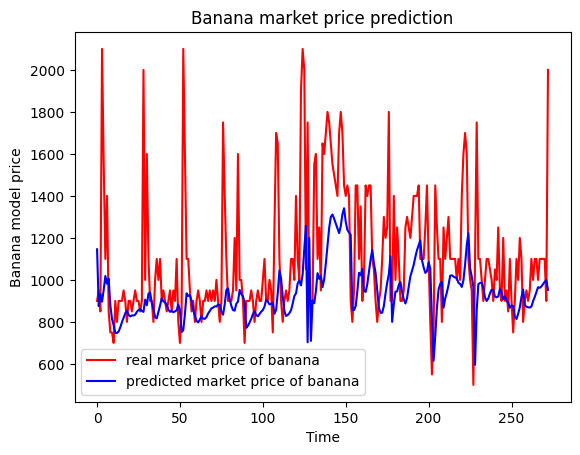

In [243]:
plt.plot(real_price,color='red',label='real market price of banana')
plt.plot(predicted_stock_price,color='blue',label='predicted market price of banana')
plt.title('Banana market price prediction')
plt.xlabel('Time')
plt.ylabel('Banana model price')
plt.legend()
plt.show()

In [245]:
from sklearn.metrics import r2_score
# Make predictions using the trained model
y_pred = model.predict(x_train)

# Calculate R-squared value
r2 = r2_score(y_train, y_pred)

print("R-squared value:", r2)

1785/1785 [==============================] - 169s 95ms/step
R-squared value: 0.8363015889986335


# Conclusions 
# 1)If we are taking other features with modal price feature then it is showing constant predicted values

# 2) By considering only modal price feature we are getting 0.836 R-squared value